**Steps for bulding ANN**
- Data Preprocessing
- Add Input Layer
- Random *w* init
- Add Hidden Layers
- Select Optimizer, Loss and Perfomance Metrics
- Compile the model
- use model.fit to train the model
- Evaluate the model
- Adjust optimization parameters, or model if needed

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [2]:
tf.__version__

'2.1.0'

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
X = dataset.drop(labels=['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)
y = dataset['Exited']

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [18]:
y.describe()[:3]

count    10000.000000
mean         0.203700
std          0.402769
Name: Exited, dtype: float64

In [23]:
import matplotlib.pyplot as plt

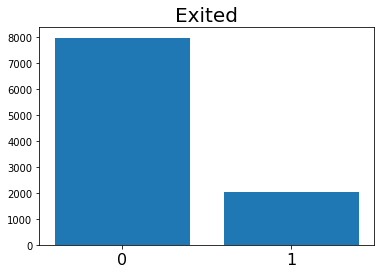

In [38]:
plt.bar([0,1], y.value_counts())
plt.xticks([0,1], fontsize=16)
plt.title('Exited', fontsize=20)
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])

In [43]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [45]:
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [46]:
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


### Feature Standardization

In [47]:
from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train

array([[-1.24021723, -1.09665089,  0.77986083, ...,  1.64099027,
        -0.57812007, -0.57504086],
       [ 0.75974873,  0.91186722, -0.27382717, ..., -1.55587522,
         1.72974448, -0.57504086],
       [-1.72725557, -1.09665089, -0.9443559 , ...,  1.1038111 ,
        -0.57812007, -0.57504086],
       ...,
       [-0.51484098,  0.91186722,  0.87565065, ..., -1.01507508,
         1.72974448, -0.57504086],
       [ 0.73902369, -1.09665089, -0.36961699, ..., -1.47887193,
        -0.57812007, -0.57504086],
       [ 0.95663657,  0.91186722, -1.32751517, ...,  0.50945854,
        -0.57812007,  1.73900686]])

 ### Build ANN

In [54]:
model = Sequential()
model.add(Dense(X.shape[1], activation = 'relu', input_dim = X.shape[1]))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [55]:
X.shape[1]

11

In [56]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [60]:
model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose = 1)

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 157us/sample - loss: 0.2991 - accuracy: 0.8733
Epoch 2/10
8000/8000 [==============================] - 2s 193us/sample - loss: 0.2982 - accuracy: 0.8735
Epoch 3/10
8000/8000 [==============================] - 1s 168us/sample - loss: 0.2965 - accuracy: 0.8763
Epoch 4/10
8000/8000 [==============================] - 1s 180us/sample - loss: 0.2976 - accuracy: 0.8730
Epoch 5/10
8000/8000 [==============================] - 2s 226us/sample - loss: 0.2976 - accuracy: 0.8755
Epoch 6/10
8000/8000 [==============================] - 2s 190us/sample - loss: 0.2962 - accuracy: 0.8759
Epoch 7/10
8000/8000 [==============================] - 2s 203us/sample - loss: 0.2962 - accuracy: 0.8752
Epoch 8/10
8000/8000 [==============================] - 1s 180us/sample - loss: 0.2967 - accuracy: 0.8784
Epoch 9/10
8000/8000 [==============================] - 1s 173us/sample - loss: 0.2944 - accuracy: 0.8777
Epoch 10/10
8000/8000 [=

In [61]:
y_pred = model.predict_classes(X_test)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [62]:
y_test

1344    1
8167    0
4747    0
5004    1
3124    1
       ..
9107    0
8249    0
8337    0
6279    1
412     0
Name: Exited, Length: 2000, dtype: int64

In [64]:
model.evaluate(X_test, y_test.to_numpy())

2000/2000 [==============================] - 0s 109us/sample - loss: 0.3817 - accuracy: 0.8390


[0.38167180931568145, 0.839]

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [67]:
confusion_matrix(y_test, y_pred)

array([[1469,  124],
       [ 198,  209]], dtype=int64)

In [68]:
accuracy_score(y_test, y_pred)

0.839